# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [6]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/last/USD-BRL,EUR-BRL,BTC-BRL')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USDBRL': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.0445', 'low': '5.0445', 'varBid': '0.001', 'pctChange': '0.02', 'bid': '5.044', 'ask': '5.045', 'timestamp': '1682596112', 'create_date': '2023-04-27 08:48:32'}, 'EURBRL': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '5.581', 'low': '5.5656', 'varBid': '-0.0014', 'pctChange': '-0.03', 'bid': '5.565', 'ask': '5.5682', 'timestamp': '1682596112', 'create_date': '2023-04-27 08:48:32'}, 'BTCBRL': {'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '152000', 'low': '139266', 'varBid': '77', 'pctChange': '0.05', 'bid': '146933', 'ask': '146985', 'timestamp': '1682596114', 'create_date': '2023-04-27 08:48:34'}}


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [12]:
print('Dólar: {}'.format(cotacoes_dic['USDBRL']['bid']))
print('Euro: {}'.format(cotacoes_dic['EURBRL']['bid']))
print('Bitcoin: {}'.format(cotacoes_dic['BTCBRL']['bid']))

Dólar: 5.044
Euro: 5.565
Bitcoin: 146933


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [23]:
cotacoes30 = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes30_dic = cotacoes30.json()
# print(cotacoes30_dic[29]['bid'])
lista = []

for cotacao in cotacoes30_dic:
    lista.append(float(cotacao['bid']))
print(lista)
print('-----------------------------------------------------------------')
    

lista_cotacoes_dolar = [float(item['bid']) for item in cotacoes30_dic]
print(lista_cotacoes_dolar)

[5.0475, 5.044, 5.0512, 5.0343, 5.0486, 5.0486, 5.0486, 5.0754, 4.9854, 4.9413, 4.9065, 4.907, 4.9275, 4.9176, 5.0049, 5.0662, 5.0549, 5.0549, 5.0549, 5.0594, 5.034, 5.0692, 5.0619, 5.0629, 5.0624, 5.094, 5.1351, 5.1655, 5.1983, 5.2459]
-----------------------------------------------------------------
[5.0475, 5.044, 5.0512, 5.0343, 5.0486, 5.0486, 5.0486, 5.0754, 4.9854, 4.9413, 4.9065, 4.907, 4.9275, 4.9176, 5.0049, 5.0662, 5.0549, 5.0549, 5.0549, 5.0594, 5.034, 5.0692, 5.0619, 5.0629, 5.0624, 5.094, 5.1351, 5.1655, 5.1983, 5.2459]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [38]:
bitcoin = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20220101&end_date=20221031')
bitcoin_dic = bitcoin.json()
lista_cotacoes_bitcoin = [float(item['bid']) for item in bitcoin_dic]
lista_cotacoes_bitcoin.reverse()
print(lista_cotacoes_bitcoin)
print(len(lista_cotacoes_bitcoin))

[188884.0, 191721.0, 191719.0, 188050.0, 190949.0, 194746.0, 192540.0, 188792.0, 191620.0, 190500.0, 190606.0, 197622.0, 191120.0, 195346.0, 197312.0, 192795.0, 188645.0, 192293.0, 195355.0, 188256.0, 195505.0, 185115.0, 184100.0, 181907.0, 175173.0, 157150.0, 160658.0, 149904.0, 150194.0, 149469.0, 154052.0, 159962.0, 152000.0, 151288.0, 143800.0, 150384.0, 143800.0, 144822.0, 149009.0, 141526.0, 144212.0, 143115.0, 141501.0, 136127.0, 138505.0, 140252.0, 151656.0, 151500.0, 146444.0, 142653.0, 143636.0, 143803.0, 150785.0, 152318.0, 148300.0, 148196.0, 145667.0, 142400.0, 135022.0, 115997.0, 114789.0, 114718.0, 104107.0, 106059.0, 98621.0, 106400.0, 107183.0, 106356.0, 104086.0, 110909.0, 111129.0, 112620.0, 110578.0, 108637.0, 106937.0, 104620.0, 100590.0, 102600.0, 102546.0, 102933.0, 107592.0, 108190.0, 111359.0, 115424.0, 114458.0, 113870.0, 110250.0, 107486.0, 105137.0, 109330.0, 111803.0, 112789.0, 114593.0, 112461.0, 122063.0, 126868.0, 127927.0, 127313.0, 125170.0, 123915.0, 

#### Gráfico com as cotações do BitCoin

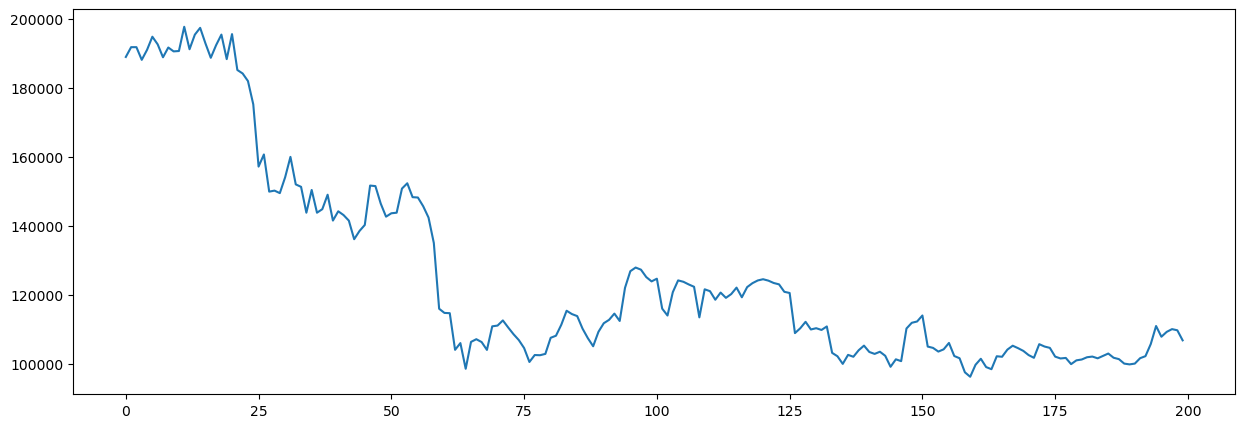

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_cotacoes_bitcoin)
plt.show()